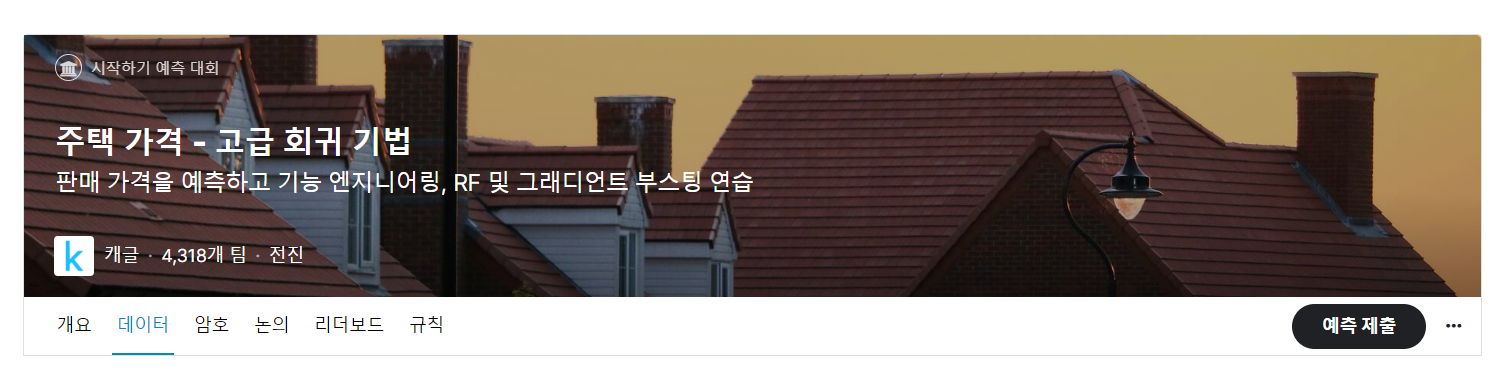

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

from pycaret import *

In [2]:
from pandas.plotting import scatter_matrix

# ----------------- 학습 ----------------------

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.ensemble     import AdaBoostClassifier, VotingClassifier

from xgboost              import XGBRegressor, XGBClassifier
from lightgbm             import LGBMRegressor, LGBMClassifier


# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

<pre>

SalePrice - 부동산의 판매 가격(달러)입니다. 이것은 예측하려는 대상 변수입니다.
MSSubClass : 건물 클래스
MSZoning : 일반적인 구역 분류
LotFrontage : 건물에 연결된 거리의 선형 피트
LotArea : 부지 크기(제곱피트)
Street : 도로 접근 유형
Alley : 골목 진입 방식
LotShape : 속성의 일반적인 모양
LandContour : 속성의 평탄도
유틸리티 : 사용 가능한 유틸리티 유형
LotConfig : 로트 구성
LandSlope : 속성의 기울기
인근 지역 : Ames 시 경계 내의 물리적 위치
조건1 : 간선도로 또는 철도와 인접
조건2 : 주요 도로 또는 철도와의 근접성(두 번째가 있는 경우)
BldgType : 주거형태
HouseStyle : 주거 형태
OverallQual : 전반적인 재료 및 마감 품질
OverallCond : 전반적인 상태 등급
YearBuilt : 원래 건설 날짜
YearRemodAdd : 리모델링 날짜
RoofStyle : 지붕의 종류
RoofMatl : 지붕재
Exterior1st : 주택 외부 피복재
Exterior2nd : 주택 외부 피복재(재료가 둘 이상인 경우)
MasVnrType : 석조 베니어 유형
MasVnrArea : 벽돌 베니어 영역(제곱피트)
ExterQual : 외장재 품질
ExterCond : 외부 자재의 현재 상태
기초 : 기초의 종류
BsmtQual : 지하실의 높이
BsmtCond : 지하실의 일반적인 상태
BsmtExposure : 파업 또는 정원 수준 지하실 벽
BsmtFinType1 : 지하 마감면의 품질
BsmtFinSF1 : 유형 1 마감 평방 피트
BsmtFinType2 : 두 번째 완성된 영역의 품질(있는 경우)
BsmtFinSF2 : 유형 2 마감 평방 피트
BsmtUnfSF : 지하 공간의 미완성 평방 피트
TotalBsmtSF : 지하 면적의 총 평방 피트
난방 : 난방의 종류
HeatingQC : 난방 품질 및 상태
CentralAir : 중앙 에어컨
전기 : 전기시스템
1stFlrSF : 1층 평방 피트
2ndFlrSF : 2층 평방 피트
LowQualFinSF : 저품질 마감 평방 피트(모든 층)
GrLivArea : 지상(지상) 거실 면적 평방피트
BsmtFullBath : 지하 전체 욕실
BsmtHalfBath : 지하 반 욕실
FullBath : 지상 위의 전체 욕실
HalfBath : 지상 반욕
침실 : 지하층 위의 침실 수
주방 : 주방 수
KitchenQual : 주방 품질
TotRmsAbvGrd : 지상 위의 총 객실 수(욕실 제외)
기능 : 홈 기능 등급
벽난로 : 벽난로 수
FireplaceQu : 벽난로 품질
GarageType : 차고 위치
GarageYrBlt : 차고가 건설된 연도
GarageFinish : 차고 내부 마감
GarageCars : 차량 수용 가능 차고의 크기
GarageArea : 평방 피트 단위의 차고 크기
GarageQual : 차고 품질
GarageCond : 차고 조건
PavedDrive : 포장된 진입로
WoodDeckSF : 목재 데크 면적(제곱피트)
OpenPorchSF : 평방 피트 단위의 열린 베란다 영역
EnclosedPorch : 평방피트 단위의 닫힌 현관 면적
3SsnPorch : 제곱피트의 3계절 베란다 면적
ScreenPorch : 스크린 베란다 면적(제곱피트)
PoolArea : 풀 면적(평방피트)
PoolQC : 수영장 품질
울타리 : 울타리 품질
MiscFeature : 다른 범주에서 다루지 않는 기타 기능
MiscVal : 기타 기능의 $Value
MoSold : 판매 월
YrSold : 판매 연도
SaleType : 판매 유형
SaleCondition : 판매 조건

***

# 도메인 분석

<pre>
● 날짜 관련 
  - ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
    
● 집 총평 
  - Overall 1 ~10  
  - Qual , QC, Qu, Cond {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
  - ['OverallQual','OverallCond','KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']     

● 판매 관련 
  - ['SaleType','SaleCondition','MSSubClass','MSZoning','BldgType','HouseStyle','Functional']
  - MSSubClass(판매유형), MSZoning(용도구분), BldgType(주거유형), HouseStyle(주거스타일), 홈기능(Functional)
              
● 전용면적 
  - ['GrLivArea','1stFlrSF','2ndFlrSF','LotArea','LandSlope','LandContour']
  - Lot*,  GrLivArea(1stFlrSF,2ndFlrSF,LotArea), LandSlope(기울기), LandContour(평평도)
              
● 내부시설(구조물갯수,난방)
  - ['TotRmsAbvGrd','Bedroom','FullBath','HalfBath','Kitchen','Utilities','Heating','HeatingQC','Fireplaces','CentralAir','Electrical']
    
● 외부시설
  - porch*, WoodDeckSF
  - 지하실 : Bsmt*  
  - 차고지: Garage*
  - 공사진행여부 ['LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
  - 기타자산 Pool, Mise ['PoolArea','PoolQC','MiscVal','MiscFeature'] 
            
● 외장재
  - Exter* , MasVnr*, FenseRoof

● 도로 
  - 포장 : Street, PavedDrive, Alley      
  - 접근성 : Condition1, Condition2, Neighborhood
</pre>

In [3]:
df = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

# EDA

<pre>

초급

1. train.csv : 학습 데이터
id : 데이터 고유 id
OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적 
target : 집값(달러 단위)


2.test.csv
id : 데이터 고유 id
OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
train_col=['id','OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageYrBlt','GarageCars','GarageArea','SalePrice']
test_col=['id','OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageYrBlt','GarageCars','GarageArea']

## id drop

In [8]:
df = df.drop('Id',axis = 1)
test = test.drop('Id',axis = 1)

# 결측 data

    - LotFrontage : 건물에 연결된 거리의 선형 피트
    - Alley : 골목 진입 방식
    - MSSubClass : 건물 클래스
    - MasVnrArea : 벽돌 베니어 영역(제곱피트)
    - BsmtQual : 지하실의 높이
    - BsmtCond : 지하실의 일반적인 상태
    - BsmtExposure : 파업 또는 정원 수준 지하실 벽
    - BsmtFinType1 : 지하 마감면의 품질
    - BsmtFinType2 : 두 번째 완성된 영역의 품질(있는 경우)
    - Electrical : 전기시스템
    - FireplaceQu : 벽난로 품질
    - GarageType : 차고 위치
    - GarageYrBlt : 차고가 건설된 연도
    - GarageFinish : 차고 내부 마감
    - GarageQual : 차고 품질
    - GarageCond : 차고 조건
    - PoolQC : 수영장 품질
    - Fence : 울타리 품질
    - MiscFeature : 다른 범주에서 다루지 않는 기타 기능

array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>],
       [<AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>],
     

<Figure size 640x480 with 0 Axes>

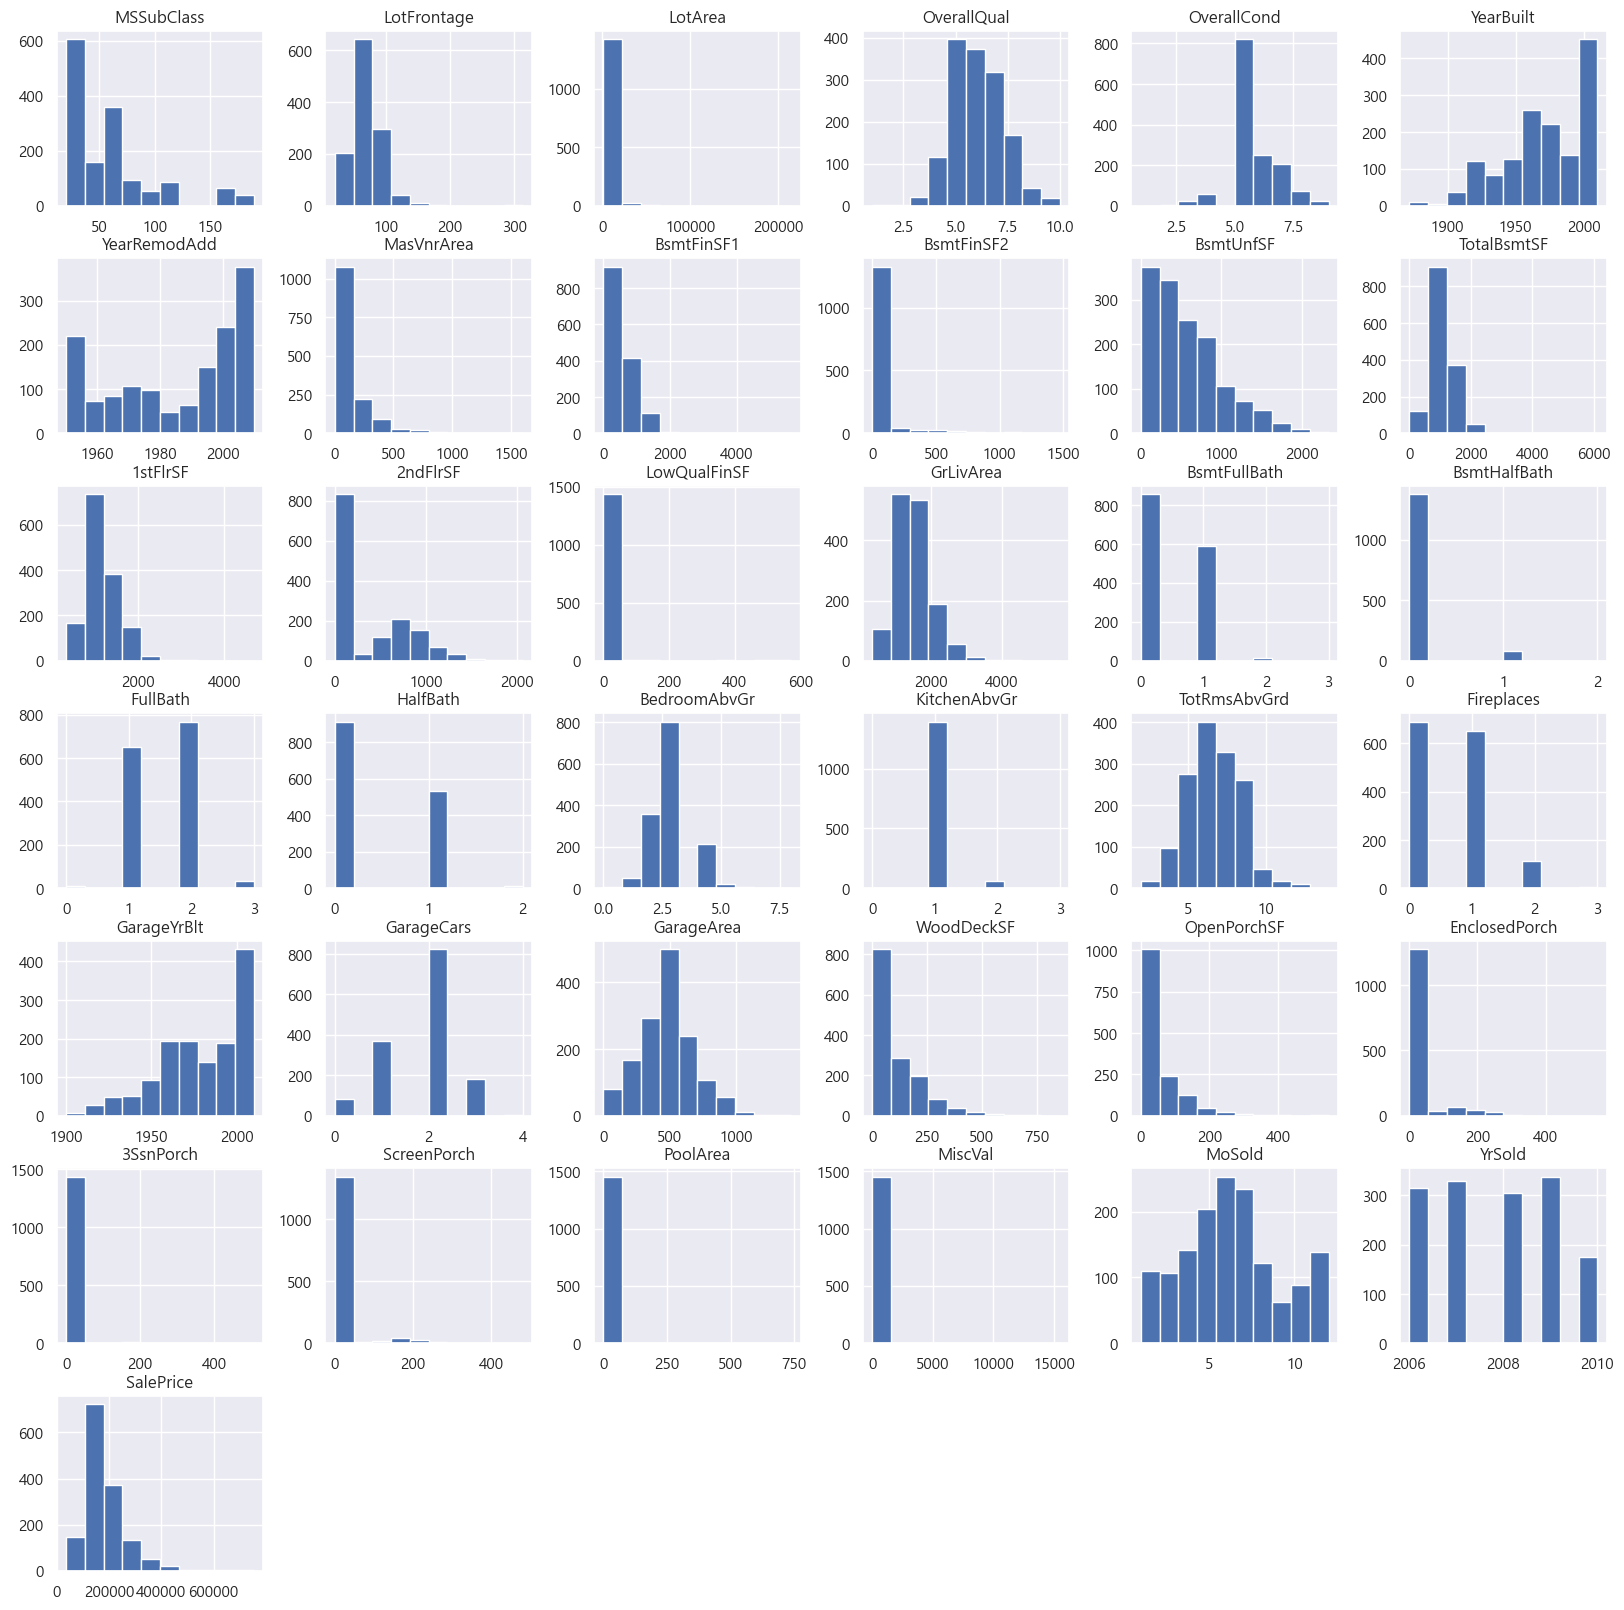

In [9]:
plt.figure()
df.hist(figsize=(20,20))

In [10]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='housing Detail')
# profile.to_file(output_file='housing_kaggle.html')

In [29]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [31]:
df_col = df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','GarageYrBlt','SalePrice']]

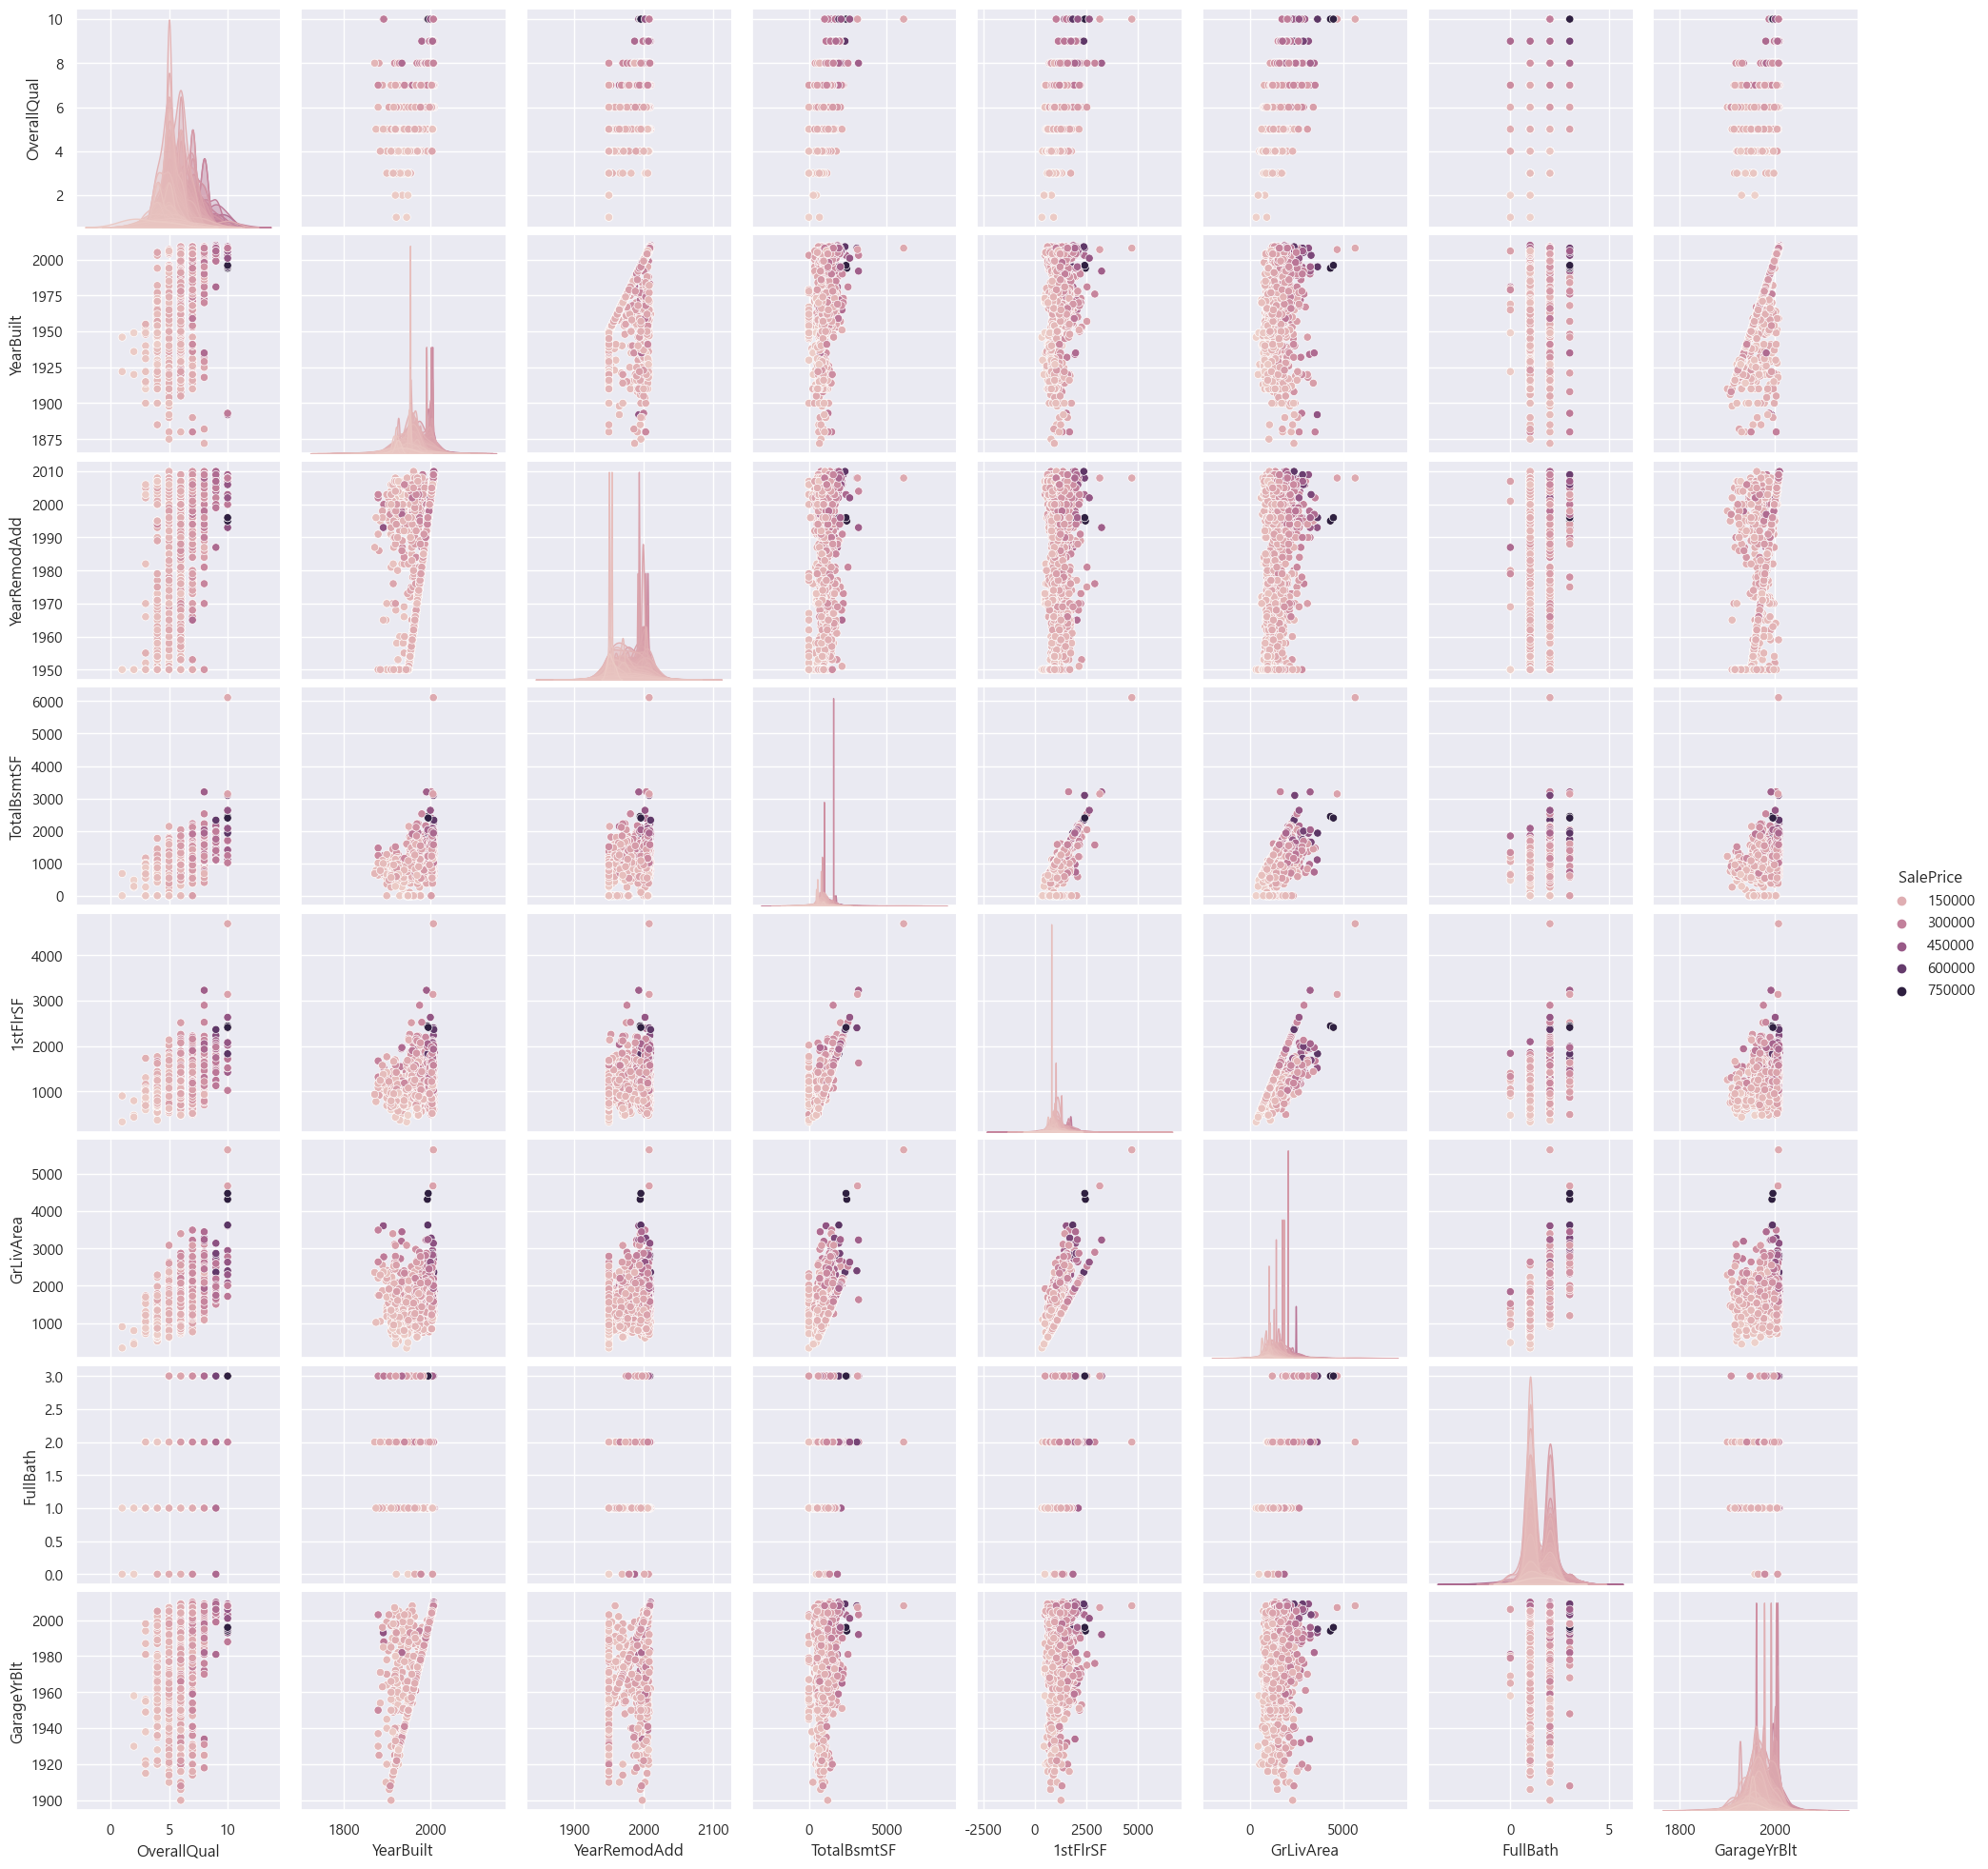

In [32]:
sns.pairplot(df_col, hue = 'SalePrice')

## 히트맵 상관 피쳐 선정

In [12]:
df_col = ['LotFrontage','OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

## 초보 피쳐

In [13]:
# train_col=['OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageYrBlt','GarageCars','GarageArea','SalePrice']
# test_col=['OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageYrBlt','GarageCars','GarageArea']

In [15]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df[train_col].corr(),annot=True, fmt=".2f", cmap='coolwarm')

In [ ]:
# sns.scatter(data = df, x = )

In [ ]:
df.head()

# 피쳐 선정

In [ ]:
train_col=['OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageYrBlt','GarageCars','GarageArea','SalePrice']
test_col=['OverallQual','YearBuilt','YearRemodAdd','ExterQual','BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','GarageYrBlt','GarageCars','GarageArea']

In [ ]:
df_1 = df[train_col]
ts_1 = test[test_col]

In [ ]:
df_1.head()

In [ ]:
# df_1 = pd.get_dummies(df)

# 점수 평가

In [ ]:
y = df_1['SalePrice']
X = df_1.drop('SalePrice',axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=21)
model = XGBClassifier( random_state=21,max_depth=30, n_estimators=200)
model.fit(X_train, y_train)
random_pred = model.predict(X_test)


print(  confusion_matrix(y_test,  random_pred)   )
print(f"정확도: {accuracy_score(y_test, random_pred):.4f}, 정밀도: {precision_score(y_test, random_pred):.4f}, 재현율: {recall_score(y_test, random_pred):.4f}, F1: {f1_score(y_test, random_pred):.4f}")

In [ ]:
# 0.9602101522058255
# 0.961060032449973
# 0.9636869350227922   # XGBClassifier( random_state=21,max_depth=50, n_estimators=200)
# 0.9645368152669397  # XGBClassifier( random_state=21,max_depth=30, n_estimators=200)


random_pred=model.predict(y_test)
accuracy_score(y_test, random_pred)